# Project 2 in Scientific Computing
## By Samuel Kaplan and Semyon Lomasov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, clear_output

In [2]:
pi = np.pi
exp = np.exp
sqrt = np.sqrt
sin = np.sin
cos = np.cos

### Suggested Activity 1

Run tacoma.m with wind speed W = 80 km/hr and initial conditions y = y ′ = θ ′ = 0, θ = 0.001. The bridge is stable in the torsional dimension if small disturbances in θ die out; unstable if they grow far beyond original size. Which occurs for this value of W ?

In [3]:
#Set parameters

len = 6
# Hooke’s nonlinearity coefficient
a = 0.2
# Wind speed in km/hr
W = 80
# Damping coefficient
d = .01

In [4]:
def ydot(t, y):
    """
    Compute the derivative of the tacoma function w.r.t. t at point t given initial conditions y
    
    Parameters
    ----------
    y : array
        vector of initial conditions
    t : real number
        point in time
    
    Returns
    -------
    array 
        vector of derivatives at t
    """
    omega = 2 * pi * 38 / 60
    a1 = exp(a * (y[0] - len * sin(y[2])))
    a2 = exp(a * (y[0] + len * sin(y[2])))

    ydot = np.zeros(4)
    ydot[0] = y[1]
    ydot[1] = (-d) * y[1] - 0.4 * (a1 + a2 - 2) / a + 0.2 * W * sin(omega * t)
    ydot[2] = y[3]
    ydot[3] = (-d) * y[3] + 1.2 * cos(y[3]) * (a1 - a2) / (len * a)

    return ydot

In [5]:
def trapstep(t, x, h, g):
    """
    Compute one step of the Trapezoid Method
    
    Parameters
    ----------
    
    t : real number
        point in time
    x : array
        array of initial values
    h : real number
        stepsize
    g : function
        take the derivative of the hard-coded function
    
    Returns
    -------
    array
        predicted values of the function at t+h
    """

    # Calculate derivative at t
    z1 = g(t, x)

    # Calculate predicted value at t + h
    s = x + h * z1

    # Calculate derivative at t + h
    z2 = g(t + h, s)

    # Calculate new value of x
    y = x + h * (z1 + z2) / 2

    return y

In [6]:
def tacoma(inter,ic,n,p,f,disbridge=True,disyt0t=False):  
    """
    Animation Program for bridge using IVP Solver.  
    
    Parameters
    ----------
    
    inter : array
        the initial and final time
    ic : array
        initial conditions
    n : natural number
        number of steps
    p : natural number
        steps per point plotted
    f : function    
        one-step method such as trapstep or runge-kutta
    disbridge : boolean
        if displays a plot of the bridge's movement
    disyt0t : boolean
        if displays a plot of y(t) and theta(t)

    Returns
    -------
    array
        values of theta(t)
    """
        
    # Calculate step size
    h = (inter[1]-inter[0])/n
    
    # Initialize y
    y = np.zeros((p + 1, 4)) 
    y[0, :] = ic

    # Initialize t
    t = np.zeros(p + 1)
    t[0] = inter[0]
    
    # Initialize z1 and z3
    z1 = np.zeros(n+1)
    z3 = np.zeros(n+1)
    
    # Set length to 6
    len = 6
    
    # Sets up the plot for disbridge outside of the for-loop
    if(disbridge):
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111)

    # Loop over time steps
    for k in range(n):

      # Loop over cable segments
        for i in range(p):

            # Update time
            t[i + 1] = t[i] + h

            # Calculate new value of y
            y[i + 1, :] = f(t[i], y[i, :], h, ydot)
            
        #Prepares the t and y arrays for animation
        y[0,:] = y[p,:]
        t[0] = t[p]

        # Saves the vertical displacement of the bridge
        z1[k] = y[0,0]

        # Saves the angle of the bridge
        z3[k] = y[0,2] 

        # Generates an animated plot of the bridge
        if(disbridge):

            c = len * math.cos(y[0,2])
            s = len * math.sin(y[0,2]) 
            
            # Reset screen
            ax.cla()

            # Sets the axes
            ax.set_xlim(-8, 8)
            ax.set_ylim(-8, 8)
            ax.set_xticks([-8, 0, 8])
            ax.set_yticks([-8, 0, 8])

            # Makes aspect ratio 1 - 1
            ax.set_aspect('equal')

            # Initialize animated lines 
            road, = ax.plot([], [], color='b', linestyle='-', linewidth=1) 
            lcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)
            rcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)

            # Update animated lines
            road.set_data([-c, c], [-s - y[0, 0], s - y[0, 0]])
            lcable.set_data([-c, -c], [-s - y[0, 0], 8])
            rcable.set_data([c, c], [s - y[0, 0], 8])
        
            # Draw animated lines
            display(fig)    
            clear_output(wait = True)

    # Generates plots for y(t) and theta(t)    
    if(disyt0t):

        plt.ion()

        # Creates a figure to graph y(t)
        time = np.linspace(inter[0], inter[1], n+1)
        figyt = plt.figure("Graph of y(t)")
        axyt = figyt.add_subplot(111)
        axyt.plot(time, z1, color='b', linestyle='-', linewidth=1) 

        # Creates a figure to graph thetat
        fig0t = plt.figure("Graph of Theta(t)")
        ax0t = fig0t.add_subplot(111)
        ax0t.plot(time, z3, color='b', linestyle='-', linewidth=1)

        # Display figures 
        display()

    #returns an array of theta(t)
    return z3

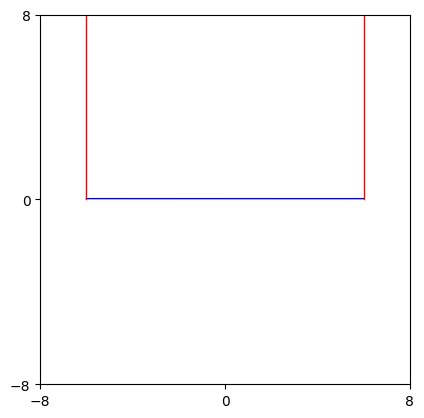

In [7]:
# Example input
z = tacoma([0,30],[1,0,0.001,0],500,5, trapstep)

Sources:
https://pythonguides.com/matplotlib-update-plot-in-loop/
https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
https://www.tutorialspoint.com/matplotlib-animation-not-working-in-ipython-notebook
https://www.geeksforgeeks.org/how-to-update-a-plot-in-matplotlib/
https://pythonspot.com/matplotlib-update-plot/

We thus see that the bridge looks torsionally unstable since small disturbances in $\theta$ seem to grow far beyond the original size and do not die out

### Suggested Activity 2

Replace the Trapezoid Method by fourth-order Runge–Kutta to improve accuracy. Also, add new figure windows to plot y(t) and θ(t).

In [8]:
def RungeKutta4(t, x, h, g):
    """
    Compute one step of the Runge-Kutta 4th Order Method
    
    Parameters
    ----------
    
    t : real number
        point in time
    x : array
        array of initial values
    h : real number
        stepsize
    g: function
        take the derivative of the hard-coded function
    
    Returns
    -------
    array
        predicted values of the function at t+h
    """
    # Calculate leftpoint derivative
    s1 = g(t, x)
    
    # Calculate midpoint derivative
    s2 = g(t+h/2, x+(h/2)*s1)
    
    # Calculate improved midpoint derivative
    s3 = g(t+h/2, x+(h/2)*s2)

    # Calculate rightpoint derivative
    s4 = g(t + h, x+h*s3)

    # Calculate new value of x
    y = x + (h/6) * (s1 + 2*s2 + 2*s3 + s4)

    return y

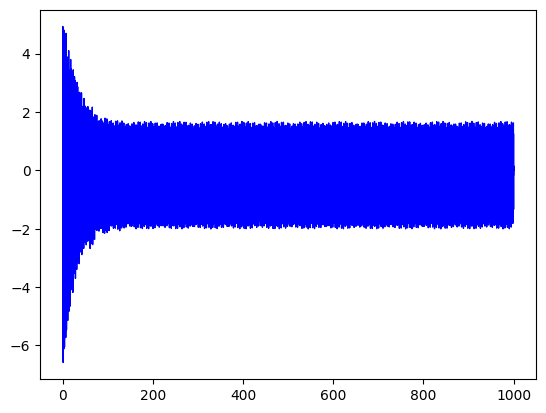

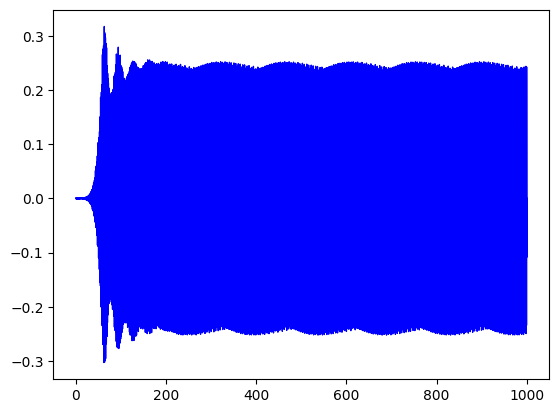

In [9]:
z=tacoma([0,1000],[1,0,0.001,0],10000,5, RungeKutta4,False,True)

We see that the bridge is torsionally unstable

### Suggested Activity 3

The system is torsionally stable for W = 50 km/hr. Find the magnification factor for a small initial angle. That is, set θ(0) = 10−3 and find the ratio of the maximum angle θ(t), 0 ≤ t < ∞, to θ(0). Is the magnification factor approximately consistent for initial angles θ(0) = 10**−4, 10**−5,...?

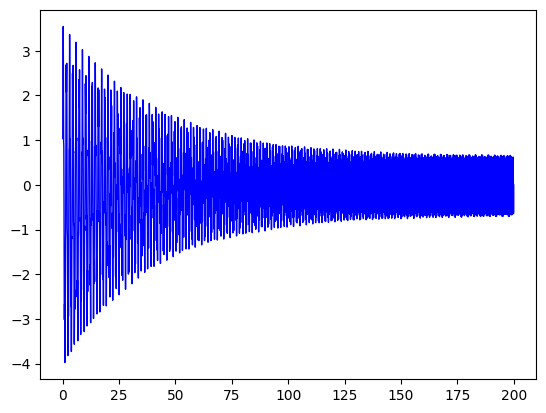

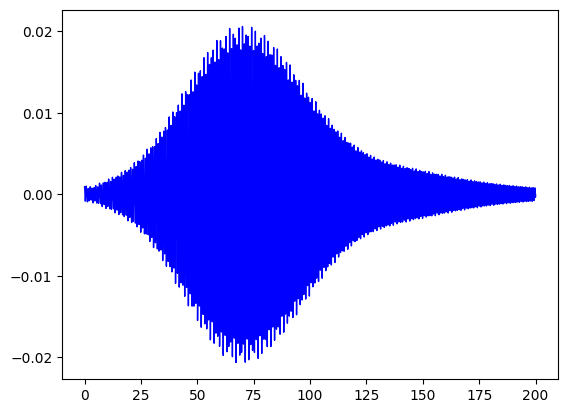

In [10]:
# Set wind speed to 50
W = 50

# Set θ(0) = 10^(−3)
theta = 0.001

z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, True)

As expected, the bridge is torsionally stable: disturbances in $\theta$ die out

In [11]:
# Calculates the magnification factor for θ(0) = 10^(−3)
print(z.max()/theta)

20.592265019540907


In [12]:
# Calculates the magnification factor for θ(0) = 10**−4, 10**−5,..., 10**−9
for i in range(4,10):
    theta = 10**(-i)
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("For θ = ", theta,", magnification factor = ", z.max()/theta)

For θ =  0.0001 , magnification factor =  20.43951460223806
For θ =  1e-05 , magnification factor =  20.437974692501644
For θ =  1e-06 , magnification factor =  20.437959291794446
For θ =  1e-07 , magnification factor =  20.43795913074319
For θ =  1e-08 , magnification factor =  20.43795917389447
For θ =  1e-09 , magnification factor =  20.437960285139386


The magnification factor is approximately consistent around 20.4395

### Suggested Activity 4

Find the minimum wind speed W for which a small disturbance θ(0) = 10−3 has a magnification factor of 100 or more. Can a consistent magnification factor be defined for this W ?

In [13]:
# Finds the minimum wind speed through guess and check

# Set theta at 10^(-3)
theta = 10**(-3)

# Checks the windspeed for a range of wind speeds from 25 to 45
for i in range(25,50,5):
    W = i
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("wind speed = ",i," ",z.max()/theta)

wind speed =  25   1.081557387678883
wind speed =  30   1.3040293664086833
wind speed =  35   2.5089815555555464
wind speed =  40   4.95286645639166
wind speed =  45   10.010974080164742


None of these speeds come close to a magnification factor of 100

In [14]:
# Checks for range of 50 to 65
for i in range(50,70,5):
    W = i
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("wind speed = ",i," ",z.max()/theta)

wind speed =  50   20.592265019540907
wind speed =  55   43.08118411953093
wind speed =  60   112.32438375754677
wind speed =  65   252.2730569922529


In [15]:
# Check for speeds between 55 and 60
for i in range(58,61):
    W = i
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("wind speed = ",i," ",z.max()/theta)

wind speed =  58   69.40019631341936
wind speed =  59   84.75995237787286
wind speed =  60   112.32438375754677


In [16]:
# The minimum wind speed must be in between 59 and 60. 
for i in range(594,598,1):
    W = i/10
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("wind speed = ",i/10," ",z.max()/theta)

wind speed =  59.4   92.24416068507317
wind speed =  59.5   94.38152467629905
wind speed =  59.6   97.13460639063594
wind speed =  59.7   100.05058588843688


We've identified 59.7 as the minimum windspeed for a magnification factor of 100. We will test if it is consistent with different values for theta

In [17]:
W = 59.7
# Checks for the magnification factor at various initial angles
for i in range(2,10):
    theta = 10**(-i)
    z = tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    print("magnification factor for theta = 10^-", i, ":", z.max()/theta)

magnification factor for theta = 10^- 2 : 25.024385882282314
magnification factor for theta = 10^- 3 : 100.05058588843688
magnification factor for theta = 10^- 4 : 76.32807287872137
magnification factor for theta = 10^- 5 : 76.24003111808005
magnification factor for theta = 10^- 6 : 76.23915065462724
magnification factor for theta = 10^- 7 : 76.23914187558377
magnification factor for theta = 10^- 8 : 76.23914179053871
magnification factor for theta = 10^- 9 : 76.23913737037734


There is a consistent magnification factor for this value of W at 76.2 assuming initial starting angle (theta) 10^-4 and smaller

### Suggested Activity 5

Design and implement a method for computing the minimum wind speed in
Step 4, to within 0.5 × 10−3 km/hr. You may want to use an equation solver from Chapter 1.

In [18]:
def derivative(f, r, e=0.00001):
    """
    Compute the derivative of the tacoma function w.r.t. t at point t given initial conditions y
    
    Parameters
    ----------
    f : function
        vector of initial conditions
    r : real number
        point of derivative estimate
    e : real number
        step in f(r+e)
    Returns
    -------
    Real number 
        Derivative at point r
    """
    return (f(r+e)-f(r))/e

def derivative_second(f,r,e=0.00001):
    return (derivative(f, r+e, e)-derivative(f, r, e))/e

In [19]:
#|x(i+1)-x(i)|<pr is the stopping condition
def solver_Newton_2(f,x,pr,stop=30):
    '''f is the function to be solved, x is initial guess, pr is desired precision, stop is the number of operations'''
    count=0
    x1=x+pr
    while (np.absolute(x1-x)>pr) and (count<stop):
        x1=x-(f(x)/derivative(f,x))
    return x, f(x)

In [20]:
def solver_bisection(f, x1, x2, pr, stop=30):
    '''f is the function to be solved, x1 and x2 is initial interval, pr is desired precision, stop is the number of operations'''
    count=0
    while( (count<stop) and ((x2-x1)/2>pr) ):
        c=(x1+x2)/2
        temp=f(c)
        if temp==0:
            break
        if f(x1)*temp < 0:
            x1=c
        else:
            x2=c
        count+=1
    return x1,x2

In [21]:
# Given θ(0) = 10−3 find the minimum wind speed that has a magnification factor of 100 or more
theta = 10**(-3)
mFactorList=[]
for i in range(590,600):
    W = i/10
    z=tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    mFactorList.append(z.max()/theta-100)

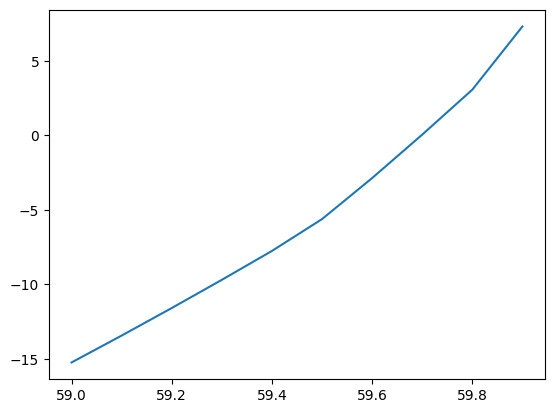

In [22]:
#Shows how close to 0 is magnification factor - 100 for different values of wind speed
plt.plot(np.arange(59,60,0.1), mFactorList)
plt.show()

The graph looks approximately linear, so let's try Newton's method. Let's start with the initial guess of 59.7

In [23]:
theta=10**(-3)
def record_magnification_factor_minus_100(windspeed):
    """
    Compute magnification factor minus 100 for given windspeed
    
    Parameters
    ----------
    windspeed : real number
        windspeed in km/hr

    Returns
    -------
    Real number 
        Magnification factor minus 100
    """

    global W
    W=windspeed
    z=tacoma([0,200],[1,0,theta,0],5000,5, RungeKutta4, False, False)
    return z.max()/theta-100

solver_Newton_2(record_magnification_factor_minus_100,59.7,0.0005,5) takes too long

In [24]:
solver_bisection(record_magnification_factor_minus_100, 59.63, 59.7, 0.0005, 5)

(59.63, 59.6321875)

In [25]:
solver_bisection(record_magnification_factor_minus_100, 59.63, 59.6322, 0.0005, 10)

(59.63, 59.63055)

### Suggested Activity 6

Try some larger values of W. Do all extremely small initial angles eventually grow to catastrophic size?

In [26]:
# Try for W = 180, 210, 240, 270
for j in range(3,7):
    theta=10**(-j)
    for i in range(180, 300,30):
        W = i
        z=tacoma([0,500],[1,0,theta,0],10000,5, RungeKutta4, False, False)
        print("wind speed = ",i," theta = ", theta, "maximum angle= ",z.max())

wind speed =  180  theta =  0.001 maximum angle=  40.229793559530656
wind speed =  210  theta =  0.001 maximum angle=  101.7347792651492
wind speed =  240  theta =  0.001 maximum angle=  524.4568165331057
wind speed =  270  theta =  0.001 maximum angle=  2991.901197279891
wind speed =  180  theta =  0.0001 maximum angle=  19.15797053199591
wind speed =  210  theta =  0.0001 maximum angle=  1414.011474725897
wind speed =  240  theta =  0.0001 maximum angle=  2389.2920341868185
wind speed =  270  theta =  0.0001 maximum angle=  785.8686593026263
wind speed =  180  theta =  1e-05 maximum angle=  115.61290626324309
wind speed =  210  theta =  1e-05 maximum angle=  76.68241903044208
wind speed =  240  theta =  1e-05 maximum angle=  1.0922104948527411
wind speed =  270  theta =  1e-05 maximum angle=  804.356313667836
wind speed =  180  theta =  1e-06 maximum angle=  303.2934582785537
wind speed =  210  theta =  1e-06 maximum angle=  171.57990474051863
wind speed =  240  theta =  1e-06 maximu

We see that most extremely small initial angles eventually grow to catastrophic size at larger values of W

### Suggested Activity 7

What is the effect of increasing the damping coefficient? Double the current value and find the change in the critical wind speed W . Can you suggest possible changes in design that might have made the bridge less susceptible to torsion?

In [27]:
# Double the value of the damping coefficient from .01 to .02
d =.02
theta=10**(-3)

In [28]:
#Check that the bisection method returns is applied in the correct interval, and return the correct interval if any
for i in range(50, 100, 2):
    if solver_bisection(record_magnification_factor_minus_100, i, i+2, 0.0005, 1)!=0:
        print(i)
        break

50


We thus see that there is no point where the magnification factor is more than 100 in the interval above. We will apply higher wind speed:

In [29]:
for i in range(100, 150, 2):
    if solver_bisection(record_magnification_factor_minus_100, i, i+2, 0.0005, 1)!=0:
        print(i)
        break

100


In [30]:
solver_bisection(record_magnification_factor_minus_100, 112, 113, 0.0005, 10)

(112, 112.0009765625)

In [31]:
solver_bisection(record_magnification_factor_minus_100, 113, 114, 0.0005, 10)

#Thus both values of minimum wind speed at 113 and 114 are bigger than 0

(113, 113.0009765625)

In [32]:
solver_bisection(record_magnification_factor_minus_100, 112.5, 113, 0.0005, 10)

(112.5, 112.5009765625)

In [33]:
solver_bisection(record_magnification_factor_minus_100, 112.7, 112.8, 0.0005, 10)

#Thus both values are less than 0

(112.7, 112.70078125)

In [34]:
solver_bisection(record_magnification_factor_minus_100, 112.8, 113, 0.0005, 10)

(112.9, 112.90078125000001)

We thus see that minimum wind speed such that the magnification factor is more than 100 is around 112.9

The bridge is almost twice as stable with the increase in the damping coefficient.

Therefore one design suggestion would be to increase the damping coefficient by building the bridge a little differently

### Convergence Verification

In [35]:
def testFunction(t, y):
    #test function: y(t) = e^(t^2), and the corresponding equation y'=2ty with y(1)=e
    return 2*t*y

In [36]:
def convergence_calculator(t, h):
    """
    Compute convergence of a given ODE solver
    
    Parameters
    ----------
    
    t: real number
        point in time
    h : real number
        step size
    
    Returns
    -------
    local errors of RK and trapstep methods at t with step h
    """
    RK_local = np.absolute(exp((t+h)**2)-RungeKutta4(t, exp(t**2), h, testFunction))
    trapstep_local = np.absolute(exp((t+h)**2)-trapstep(t, exp(t**2), h, testFunction))
    return RK_local, trapstep_local

In [37]:
np.set_printoptions(precision=16)

a,b = np.vectorize(convergence_calculator)(np.arange(1,1.1,0.01), 0.01)

print(a)

print(b)

[7.5025319290489279e-11 8.0421891368587239e-11 8.6182172509552402e-11
 9.2331475798346219e-11 9.8891561606251344e-11 1.0589351617795728e-10
 1.1336132033079593e-10 1.2132916893392576e-10 1.2982681596440671e-10
 1.3888890038060708e-10 1.4855183749773460e-10]
[3.7111667094968936e-06 3.9004514484908270e-06 4.0990335694601754e-06
 4.3073744744326348e-06 4.5259593113300411e-06 4.7552982560539192e-06
 4.9959278438649335e-06 5.2484124020146794e-06 5.5133455334477333e-06
 5.7913517110819157e-06 6.0830879409223826e-06]


We see that the local error is consistent with the theoretical rate: of orders  ℎ∗10−5
  and  ℎ∗10−3
  for Runge-Kutta 4 and Trapezoid respectively.

Global error will be more difficult to compute as it would require the Lipshitz constant. Since local error fits perfectly, we assume that so does the global error.